In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from csv import DictReader,reader
import pandas as pd
import statistics as stat
pd.options.mode.chained_assignment = None

In [2]:
f = open("D:/Froze/Documents/RudarjenjePodatki2.csv")
dt = pd.read_csv(f,encoding = "windows-1250")
dt = dt[dt['Število posameznikov - SKUPAJ']!=0]
dt['NAMEN UPORABE INTERNETA'] = dt['NAMEN UPORABE INTERNETA'].str.replace(".","")

Uporaba interneta po letih.

In [3]:
def najdi(leto,df,col):
    leto2015 = df.sort_values(leto,ascending=False)
    top5Nameni = leto2015[col].head(5)
    top5Uporabe = leto2015[leto].head(5)
    return top5Nameni,top5Uporabe,leto

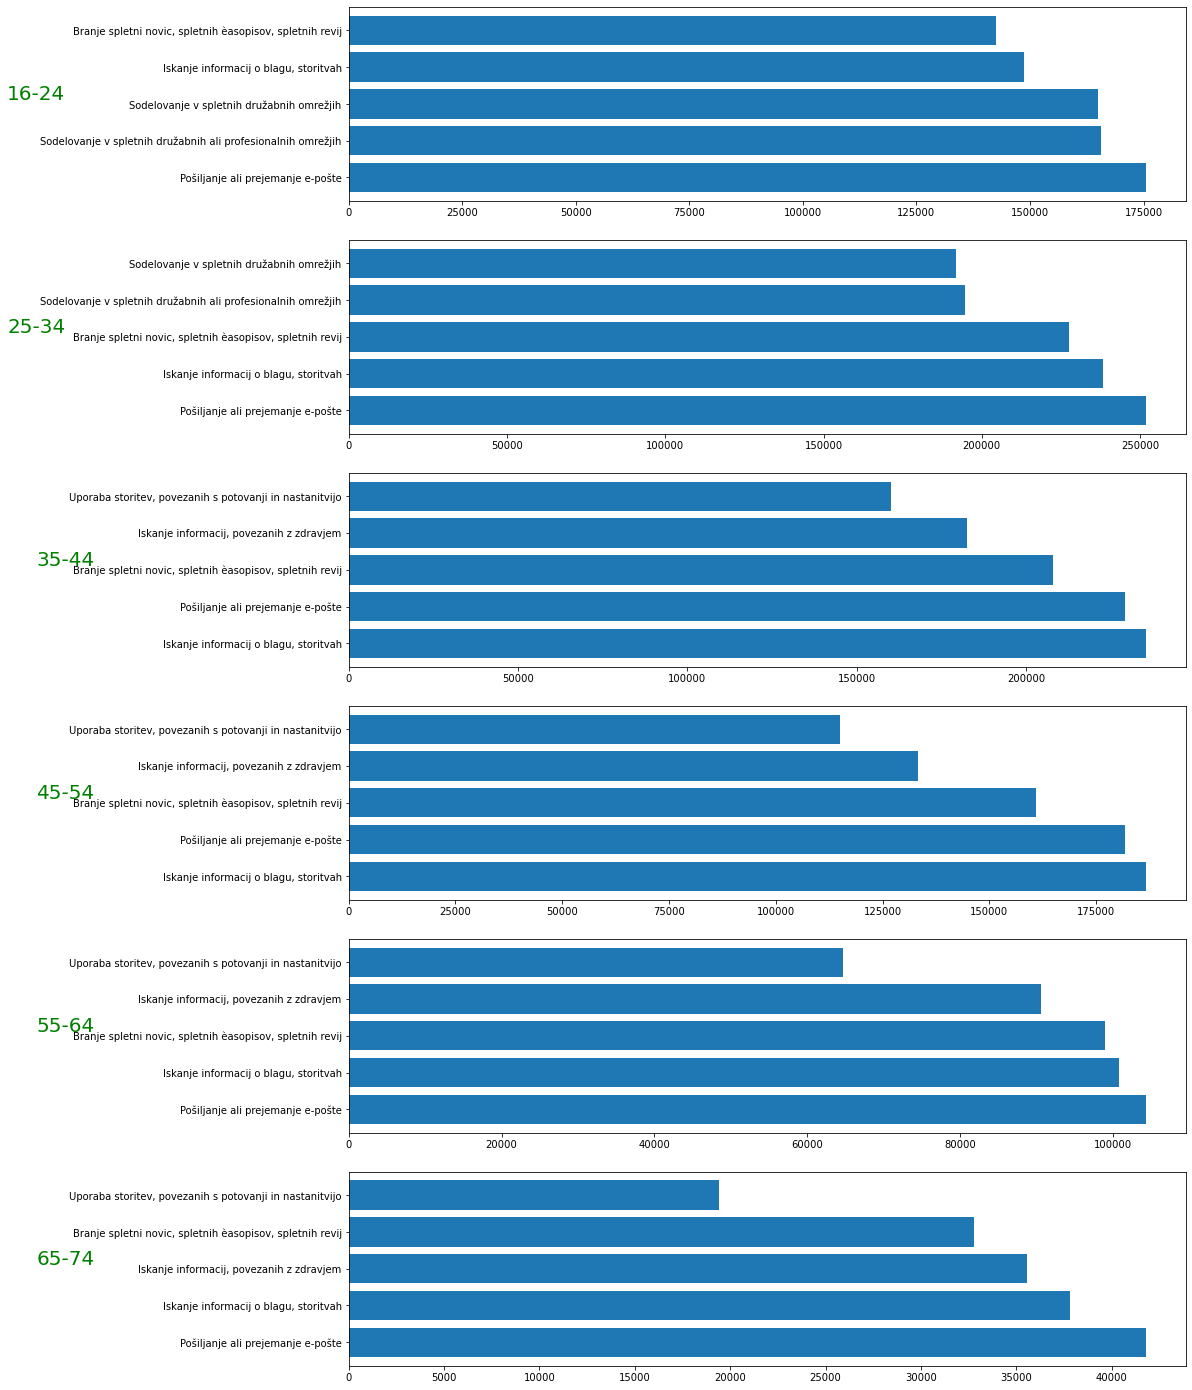

In [4]:

leto2015 = dt.loc[(dt["LETO"]==2015) & (dt["Število posameznikov - SKUPAJ"] > 0)][2:]


fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,figsize=(15,25))

top5n,top5u,let = najdi("16-24",leto2015,"NAMEN UPORABE INTERNETA")
ax1.barh(top5n,top5u)
ax1.set_ylabel("16-24",rotation="horizontal",size=20,color="g")
top5n,top5u,let = najdi("25-34",leto2015,"NAMEN UPORABE INTERNETA")
ax2.barh(top5n,top5u)
ax2.set_ylabel("25-34",rotation="horizontal",size=20,color="g")
top5n,top5u,let = najdi("35-44",leto2015,"NAMEN UPORABE INTERNETA")
ax3.barh(top5n,top5u)
ax3.set_ylabel("35-44",rotation="horizontal",size=20,color="g")
top5n,top5u,let = najdi("45-54",leto2015,"NAMEN UPORABE INTERNETA")
ax4.barh(top5n,top5u)
ax4.set_ylabel("45-54",rotation="horizontal",size=20,color="g")
top5n,top5u,let = najdi("55-64",leto2015,"NAMEN UPORABE INTERNETA")
ax5.barh(top5n,top5u)
ax5.set_ylabel("55-64",rotation="horizontal",size=20,color="g")
top5n,top5u,let = najdi("65-74",leto2015,"NAMEN UPORABE INTERNETA")
ax6.barh(top5n,top5u)
ax6.set_ylabel("65-74",rotation="horizontal",size=20,color="g")

fig.set_label("Leto 2015")




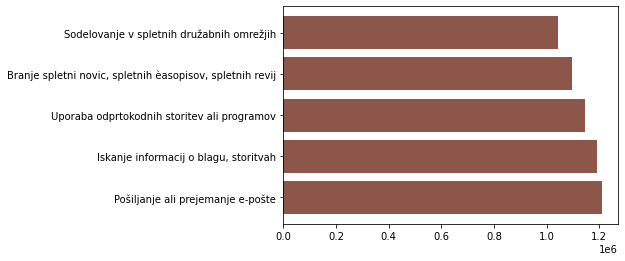

In [5]:
def najdi2(leto,df,col):
    letoX = df.sort_values(leto,ascending=False)
    top5Nameni = leto2015[col].head(5)
    top5Uporabe = leto2015[leto].head(5)
    return top5Nameni,top5Uporabe,leto

for leto in dt.LETO.unique():
    x = dt.loc[(dt["LETO"]==2020) & (dt["Število posameznikov - SKUPAJ"] > 0)][2:]
    x = x.sort_values("Število posameznikov - SKUPAJ",ascending=False)
    plt.barh(x["NAMEN UPORABE INTERNETA"].head(5),x["Število posameznikov - SKUPAJ"].head(5))


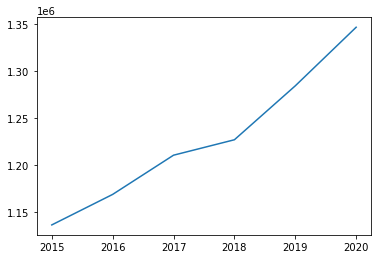

In [6]:
redni = dt.loc[(dt["NAMEN UPORABE INTERNETA"] == "Uporaba interneta v zadnjih 3 mesecih (redni uporabniki)" ) | (dt["NAMEN UPORABE INTERNETA"] == "Posamezniki - SKUPAJ" )]
plt.plot(redni.LETO.unique(),redni["Število posameznikov - SKUPAJ"][1::2])

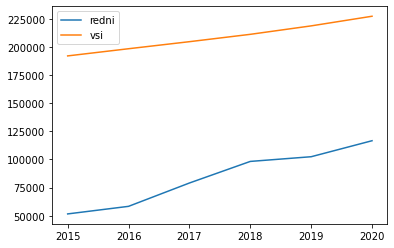

In [7]:
plt.plot(redni.LETO.unique(),redni["65-74"][1::2],label="redni")
plt.plot(redni.LETO.unique(),redni["65-74"][::2],label="vsi")
plt.legend()


In [8]:
print(dt['NAMEN UPORABE INTERNETA'].unique()[2:])
len(dt['NAMEN UPORABE INTERNETA'].unique()) - 2

['Pošiljanje ali prejemanje e-pošte' 'E-banèništvo'
 'Iskanje informacij o blagu, storitvah'
 'Branje spletni novic, spletnih èasopisov, spletnih revij'
 'Telefoniranje ali video telefoniranje s spletno kamero prek interneta'
 'Nalaganje lastnih vsebin na spletne strani' 'Prodaja blaga, storitev'
 'Uporaba prostora za hrambo podatkov na internetu za shranjevanje datotek'
 'Iskanje informacij, povezanih z zdravjem'
 'Sodelovanje v spletnih družabnih ali profesionalnih omrežjih'
 'Sodelovanje v spletnih družabnih omrežjih'
 '…Vsak dan ali skoraj vsak dan' '…Vsaj enkrat na teden'
 '…Manj kot enkrat na teden'
 'Sodelovanje v profesionalnih spletnih omrežjih'
 'Uporaba interneta za izobraževalne aktivnosti'
 'Udeležba spletnega teèaja'
 'Uporaba spletnega gradiva za izobraževanje (npr avdiovizualno gradivo, elektronske uèbenike, programe za izobraževanje ipd)'
 'Komuniciranje prek izobraževalnih spletnih strani ali portalov s predavatelji ali študenti'
 'Pridobivanje informacij o izobraževa

58

In [9]:
for leto in dt['LETO'].unique():
    maxi = dt[(dt['LETO'] == leto)&(dt['NAMEN UPORABE INTERNETA'] != 'Posamezniki - SKUPAJ')&(dt['NAMEN UPORABE INTERNETA'] != 'Uporaba interneta v zadnjih 3 mesecih (redni uporabniki)')]['Število posameznikov - SKUPAJ'].max()
    print(leto,dt[dt['Število posameznikov - SKUPAJ']==maxi]['NAMEN UPORABE INTERNETA'].values," Število Uporabnikov: ",maxi)

2015 ['Pošiljanje ali prejemanje e-pošte']  Število Uporabnikov:  984153
2016 ['Pošiljanje ali prejemanje e-pošte']  Število Uporabnikov:  1020811
2017 ['Iskanje informacij o blagu, storitvah']  Število Uporabnikov:  1064399
2018 ['Pošiljanje ali prejemanje e-pošte']  Število Uporabnikov:  1076948
2019 ['Pošiljanje ali prejemanje e-pošte']  Število Uporabnikov:  1108694
2020 ['Pošiljanje ali prejemanje e-pošte']  Število Uporabnikov:  1211137


In [10]:
men = []
women = []
for leto in dt['LETO'].unique():
    men.append(dt[(dt['LETO']==leto)&(dt['NAMEN UPORABE INTERNETA'] == 'Posamezniki - SKUPAJ')]['Moški - SKUPAJ'].values)
    women.append(dt[(dt['LETO']==leto)&(dt['NAMEN UPORABE INTERNETA'] == 'Posamezniki - SKUPAJ')]['Ženske - SKUPAJ'].values)

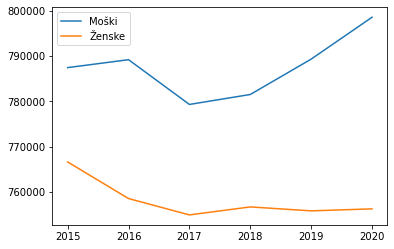

In [11]:
plt.plot(dt['LETO'].unique(),men,label="Moški")
plt.plot(dt['LETO'].unique(),women,label="Ženske")
plt.legend()

In [12]:
for leto in dt['LETO'].unique():
    print(leto,"\nŽenske:\n\n",dt[dt['LETO'] == leto].sort_values(['Ženske - SKUPAJ'],ascending=False)['NAMEN UPORABE INTERNETA'].values[2:7])
    print("\nMoški:\n\n",dt[dt['LETO'] == leto].sort_values(['Moški - SKUPAJ'],ascending=False)['NAMEN UPORABE INTERNETA'].values[2:7],"\n")   

2015 
Ženske:

 ['Pošiljanje ali prejemanje e-pošte'
 'Iskanje informacij o blagu, storitvah'
 'Iskanje informacij, povezanih z zdravjem'
 'Branje spletni novic, spletnih èasopisov, spletnih revij'
 'Sodelovanje v spletnih družabnih ali profesionalnih omrežjih']

Moški:

 ['Pošiljanje ali prejemanje e-pošte'
 'Iskanje informacij o blagu, storitvah'
 'Branje spletni novic, spletnih èasopisov, spletnih revij'
 'Iskanje informacij, povezanih z zdravjem'
 'Uporaba storitev, povezanih s potovanji in nastanitvijo'] 

2016 
Ženske:

 ['Pošiljanje ali prejemanje e-pošte'
 'Iskanje informacij o blagu, storitvah'
 'Branje spletni novic, spletnih èasopisov, spletnih revij'
 'Iskanje informacij, povezanih z zdravjem'
 'Gledanje video vsebin na spletnih straneh za deljenje video vsebin, npr YouTube']

Moški:

 ['Iskanje informacij o blagu, storitvah'
 'Pošiljanje ali prejemanje e-pošte'
 'Branje spletni novic, spletnih èasopisov, spletnih revij'
 'Gledanje video vsebin na spletnih straneh za deljen

In [13]:
new_data = pd.DataFrame(columns=('Namen',"16-24","25-34","35-44","45-54","55-64","65-74"))
new_data['Namen'] = dt['NAMEN UPORABE INTERNETA'].unique()

In [14]:
new_data = new_data[2:]

In [15]:
for starost in new_data.columns[1:]:
    l = []
    for namen in dt['NAMEN UPORABE INTERNETA'].unique()[2:]:
        l.append(dt[dt['NAMEN UPORABE INTERNETA']==namen][starost].sum())
    new_data[starost] = l
    

In [16]:
for starost in new_data.columns[1:]:
    print(starost,":\n",new_data.sort_values(starost,ascending=False)['Namen'].values[:5],"\n")

16-24 :
 ['Pošiljanje ali prejemanje e-pošte'
 'Sodelovanje v spletnih družabnih omrežjih'
 'Iskanje informacij o blagu, storitvah'
 'Branje spletni novic, spletnih èasopisov, spletnih revij'
 'Telefoniranje ali video telefoniranje s spletno kamero prek interneta'] 

25-34 :
 ['Pošiljanje ali prejemanje e-pošte'
 'Iskanje informacij o blagu, storitvah'
 'Sodelovanje v spletnih družabnih omrežjih'
 'Branje spletni novic, spletnih èasopisov, spletnih revij'
 'Iskanje informacij, povezanih z zdravjem'] 

35-44 :
 ['Pošiljanje ali prejemanje e-pošte'
 'Iskanje informacij o blagu, storitvah'
 'Iskanje informacij, povezanih z zdravjem'
 'Branje spletni novic, spletnih èasopisov, spletnih revij' 'E-banèništvo'] 

45-54 :
 ['Iskanje informacij o blagu, storitvah'
 'Pošiljanje ali prejemanje e-pošte'
 'Branje spletni novic, spletnih èasopisov, spletnih revij'
 'Iskanje informacij, povezanih z zdravjem' 'E-banèništvo'] 

55-64 :
 ['Iskanje informacij o blagu, storitvah'
 'Pošiljanje ali prejeman